# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
weatherPraga2<-weatherPraga[,c("DATE", "PRCP")]
head(weatherPraga2[order(weatherPraga2$PRCP, decreasing=T),], 10)

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [3]:
print(paste("Grados que ha aumentado la temperatura mínima cada año:",
            summary(lm(formula = weatherPraga$EMNT ~ weatherPraga$DATE))$coefficients[2, 1]))

[1] "Grados que ha aumentado la temperatura mínima cada año: 0.0173750305134395"


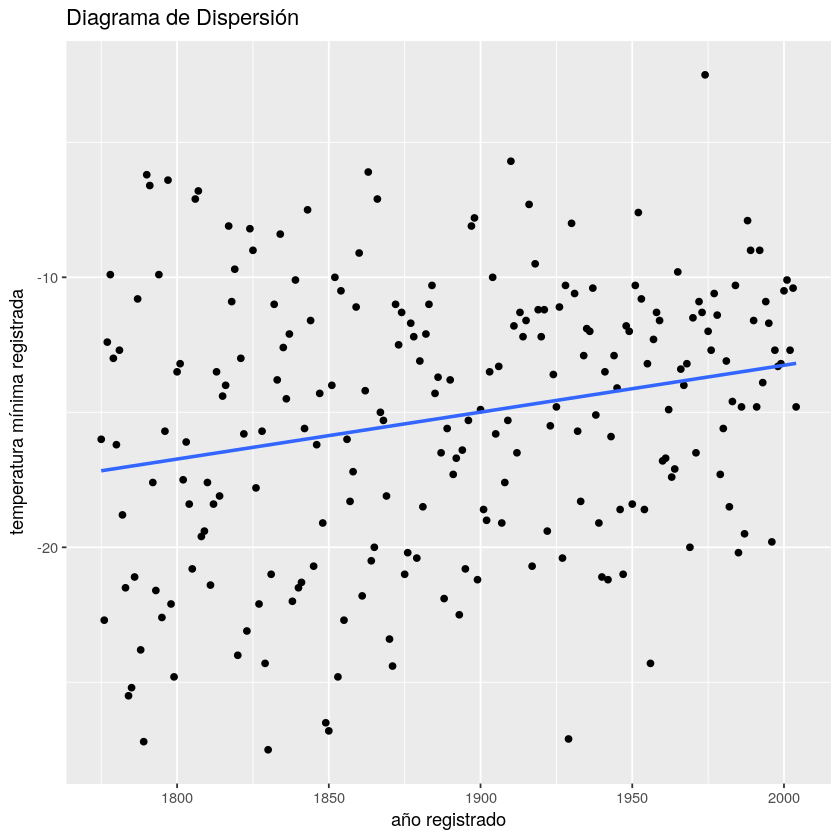

In [4]:
library(ggplot2)
ggplot(data=weatherPraga, aes(x=DATE, y=EMNT)) + 
     geom_point() + 
     ggtitle("Diagrama de Dispersión") + 
     xlab("año registrado") + 
     ylab("temperatura mínima registrada") + 
     geom_smooth(method=lm, se = FALSE)

In [5]:
sprintf(paste("Grados que ha aumentado la temperatura mínima cada año:",
            summary(lm(formula = weatherPraga$EMNT ~ weatherPraga$DATE))$coefficients[2, 1]))

[1] "Grados que ha aumentado la temperatura mínima cada año: 0.0173750305134395"

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [6]:
m1<-(weatherPraga[weatherPraga$DATE >= 1775 & weatherPraga$DATE <= 1794, ]$EMNT)
m2<-(weatherPraga[weatherPraga$DATE >= 1985 & weatherPraga$DATE <= 2004, ]$EMNT)
sprintf(paste("La media del intervalo de años [1775,1794] es:", mean(m1), "y la del intervalo de años [1985,2004]", mean(m2)))
sprintf("El t-test es usado cuando tienes dos grupos de datos y quieres saber si la media de ambos grupos es igual o no. Empezamos con las siguientes asumpciones:")
sprintf("  - Las muestras han sido seleccionas por muestreo aleatorio simple dentro de la población.")
sprintf("  - Las poblaciones siguen una distribución normal.")
sprintf("  - Ambas poblaciones tienen la misma varianza.")
sprintf("  - Las poblaciones no están correladas.")
sprintf(paste("Num. de elementos del grupo1 (m1) es ", length(m1), "y del grupo2 (m2) es ", length(m2)))
sprintf(paste("La varianza de (m1) es ", var(m1), "y de (m2) es ", var(m2), "donde se ve una amplia diferencia, 
por lo que al comparar las medias con varianzas distintas utilizaremos el t-test de Welch para el 
cálculo de si existe diferencia estadistica significativa"))

[1] "La media del intervalo de años [1775,1794] es: -16.935 y la del intervalo de años [1985,2004] -13.04"

[1] "El t-test es usado cuando tienes dos grupos de datos y quieres saber si la media de ambos grupos es igual o no. Empezamos con las siguientes asumpciones:"

[1] "  - Las muestras han sido seleccionas por muestreo aleatorio simple dentro de la población."

[1] "  - Las poblaciones siguen una distribución normal."

[1] "  - Ambas poblaciones tienen la misma varianza."

[1] "  - Las poblaciones no están correladas."

[1] "Num. de elementos del grupo1 (m1) es  20 y del grupo2 (m2) es  20"

[1] "La varianza de (m1) es  42.3866052631579 y de (m2) es  12.5593684210526 donde se ve una amplia diferencia, \npor lo que al comparar las medias con varianzas distintas utilizaremos el t-test de Welch para el \ncálculo de si existe diferencia estadistica significativa"

In [7]:
sprintf(paste("El p-valor es",t.test(m1,m2,var.equal = FALSE)$p.value,". En este caso es p-valor es bajo, así que podemos rechazar la hipótesis nula y asumir que ambas medias no son iguales."))

[1] "El p-valor es 0.0257068429001728 . En este caso es p-valor es bajo, así que podemos rechazar la hipótesis nula y asumir que ambas medias no son iguales."

### Datos banco mundial

Carga los datos del banco mundial

In [8]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
sprintf(paste("Tenemos un total de",nrow(realCountryData),"paises"))
sprintf(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
sprintf(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"

[1] "Tenemos un total de 46 regiones"

[1] "Tenemos un total de 80 indicadores"

¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData* (realCountryData$TableName)

El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [9]:
databank1<-subset(databank, select=c("Indicator.Code", "1970","Country.Name","Country.Code","Indicator.Name"))
databank2<-databank1[databank1$Indicator.Code == "EN.ATM.GHGT.KT.CE",]
databank3<-databank2[complete.cases(databank2[2]), ]
databank4<-merge(x=databank3,y=realCountryData, by.x=c("Country.Name"), by.y=c("TableName"))
databank4[order(databank4$"1970", decreasing=T),]

,Country.Name,Indicator.Code,1970,Country.Code.x,Indicator.Name,Country.Code.y,Region,IncomeGroup,SpecialNotes,X
181,United States,EN.ATM.GHGT.KT.CE,5400503.5,USA,Total greenhouse gas emissions (kt of CO2 equivalent),USA,North America,High income,Fiscal year end: September 30; reporting period for national accounts data: CY.,NA
143,Russian Federation,EN.ATM.GHGT.KT.CE,2240873.0,RUS,Total greenhouse gas emissions (kt of CO2 equivalent),RUS,Europe & Central Asia,Upper middle income,The new base year is 2011.,NA
39,China,EN.ATM.GHGT.KT.CE,1873971.7,CHN,Total greenhouse gas emissions (kt of CO2 equivalent),CHN,East Asia & Pacific,Upper middle income,"On 1 July 1997 China resumed its exercise of sovereignty over Hong Kong; and on 20 December 1999 China resumed its exercise of sovereignty over Macao. Unless otherwise noted, data for China do not include data for Hong Kong SAR, China; Macao SAR, China; or Taiwan, China. National accounts have been revised from 2010-2015 based on the National Bureau of Statistics data and World Bank estimates. The new base year is 2010.",NA
42,"Congo, Dem. Rep.",EN.ATM.GHGT.KT.CE,1550424.4,COD,Total greenhouse gas emissions (kt of CO2 equivalent),COD,Sub-Saharan Africa,Low income,WB-3 code changed from ZAR to COD to align with ISO code.,NA
66,Germany,EN.ATM.GHGT.KT.CE,1286569.9,DEU,Total greenhouse gas emissions (kt of CO2 equivalent),DEU,Europe & Central Asia,High income,"A simple multiplier is used to convert the national currencies of EMU members to euros. The following irrevocable euro conversion rate was adopted by the EU Council on January 1, 1999: 1 euro = 1.95583 German mark. Please note that historical data before 1999 are not actual euros and are not comparable or suitable for aggregation across countries.",NA
25,Brazil,EN.ATM.GHGT.KT.CE,1260982.1,BRA,Total greenhouse gas emissions (kt of CO2 equivalent),BRA,Latin America & Caribbean,Upper middle income,,NA
89,Japan,EN.ATM.GHGT.KT.CE,941132.6,JPN,Total greenhouse gas emissions (kt of CO2 equivalent),JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period for national accounts data: CY.,NA
180,United Kingdom,EN.ATM.GHGT.KT.CE,839587.4,GBR,Total greenhouse gas emissions (kt of CO2 equivalent),GBR,Europe & Central Asia,High income,,NA
81,India,EN.ATM.GHGT.KT.CE,746498.1,IND,Total greenhouse gas emissions (kt of CO2 equivalent),IND,South Asia,Lower middle income,Fiscal year end: March 31; reporting period for national accounts data: FY. Based on official government statistics; the new base year is 2011/12. India reports using SNA 2008.,NA
121,Myanmar,EN.ATM.GHGT.KT.CE,655739.1,MMR,Total greenhouse gas emissions (kt of CO2 equivalent),MMR,East Asia & Pacific,Lower middle income,Fiscal year end: March 31; reporting period for national accounts data: FY. Based on the government’s Planning Department and the IMF national accounts have been revised from 2010 to 2015. The new base year is 2010/11.,NA


United States	5400503500 toneladas de CO2

¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [10]:
databank1<-subset(databank, select=c("Indicator.Code", "2012","Country.Name","Country.Code","Indicator.Name"))
databank2<-databank1[databank1$Indicator.Code == "EN.ATM.GHGT.KT.CE",]
databank3<-databank2[complete.cases(databank2[2]), ]
databank4<-merge(x=databank3,y=realCountryData, by.x=c("Country.Name"), by.y=c("TableName"))
head(databank4[order(databank4$"2012", decreasing=T),])

,Country.Name,Indicator.Code,2012,Country.Code.x,Indicator.Name,Country.Code.y,Region,IncomeGroup,SpecialNotes,X
35,China,EN.ATM.GHGT.KT.CE,12454711,CHN,Total greenhouse gas emissions (kt of CO2 equivalent),CHN,East Asia & Pacific,Upper middle income,"On 1 July 1997 China resumed its exercise of sovereignty over Hong Kong; and on 20 December 1999 China resumed its exercise of sovereignty over Macao. Unless otherwise noted, data for China do not include data for Hong Kong SAR, China; Macao SAR, China; or Taiwan, China. National accounts have been revised from 2010-2015 based on the National Bureau of Statistics data and World Bank estimates. The new base year is 2010.",NA
164,United States,EN.ATM.GHGT.KT.CE,6343841,USA,Total greenhouse gas emissions (kt of CO2 equivalent),USA,North America,High income,Fiscal year end: September 30; reporting period for national accounts data: CY.,NA
77,India,EN.ATM.GHGT.KT.CE,3002895,IND,Total greenhouse gas emissions (kt of CO2 equivalent),IND,South Asia,Lower middle income,Fiscal year end: March 31; reporting period for national accounts data: FY. Based on official government statistics; the new base year is 2011/12. India reports using SNA 2008.,NA
24,Brazil,EN.ATM.GHGT.KT.CE,2989418,BRA,Total greenhouse gas emissions (kt of CO2 equivalent),BRA,Latin America & Caribbean,Upper middle income,,NA
129,Russian Federation,EN.ATM.GHGT.KT.CE,2803398,RUS,Total greenhouse gas emissions (kt of CO2 equivalent),RUS,Europe & Central Asia,Upper middle income,The new base year is 2011.,NA
84,Japan,EN.ATM.GHGT.KT.CE,1478859,JPN,Total greenhouse gas emissions (kt of CO2 equivalent),JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period for national accounts data: CY.,NA


China 12454711 kt of CO2 equivalent
United States 6343841 kt of CO2 equivalent
India 3002895 kt of CO2 equivalent
Brazil 2989418 kt of CO2 equivalent
Russian Federation 2803398 kt of CO2 equivalent

¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [11]:
databank1<-subset(databank, select=c("Country.Name","Indicator.Code","2000","2001","2002","2003",
                                     "2004","2005","2006","2007","2008","2009","2010","2011","2012"))
databank2<-databank1[databank1$Country.Name == "China" & databank1$Indicator.Code == "EN.ATM.GHGT.KT.CE",]
seq1<-4:ncol(databank2)
seq2<-3:(ncol(databank2)-1)

sum(((databank2[1,seq1]-databank2[1,seq2])/databank2[1,seq1])*100)/(ncol(databank2)-1)


[1] 6.121822

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

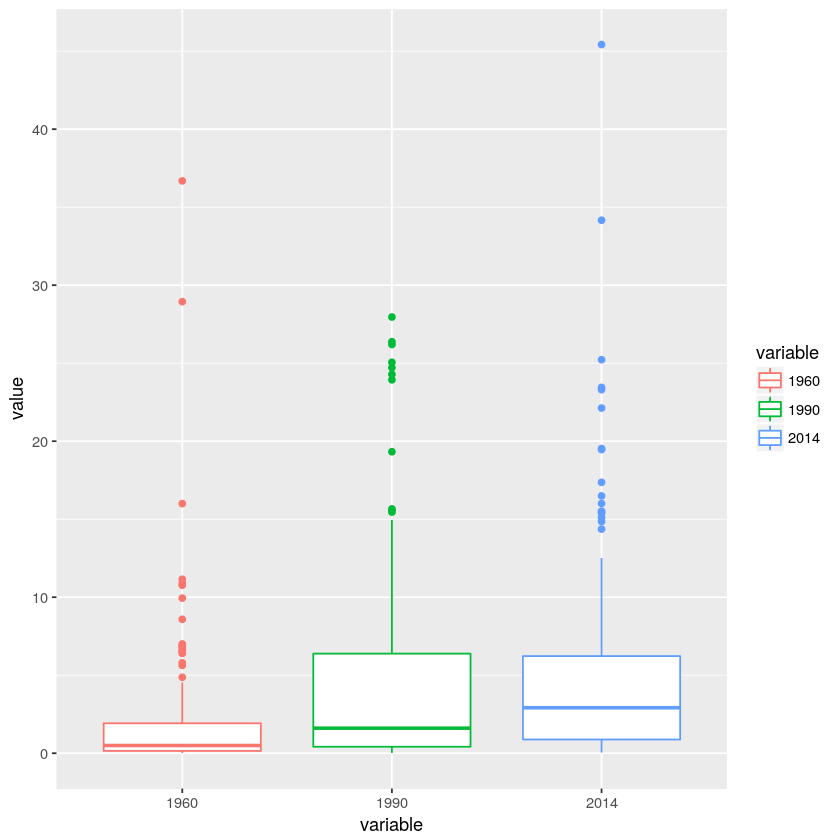

In [12]:
databank1<-subset(databank, select=c("Indicator.Code","1960","1990","2014","Country.Name"))
databank2<-databank1[databank1$Indicator.Code == "EN.ATM.CO2E.PC",]
databank3<-merge(x=databank2,y=realCountryData, by.x=c("Country.Name"), by.y=c("TableName"))
databank4<-subset(databank3, select=c("Country.Name","1960","1990","2014"))
library(reshape2)
databank5<-melt(databank4, id = "Country.Name")
databank6<-databank5[complete.cases(databank5),]
ggplot(data=databank6,aes(x=variable,y=value,color=variable))+geom_boxplot()

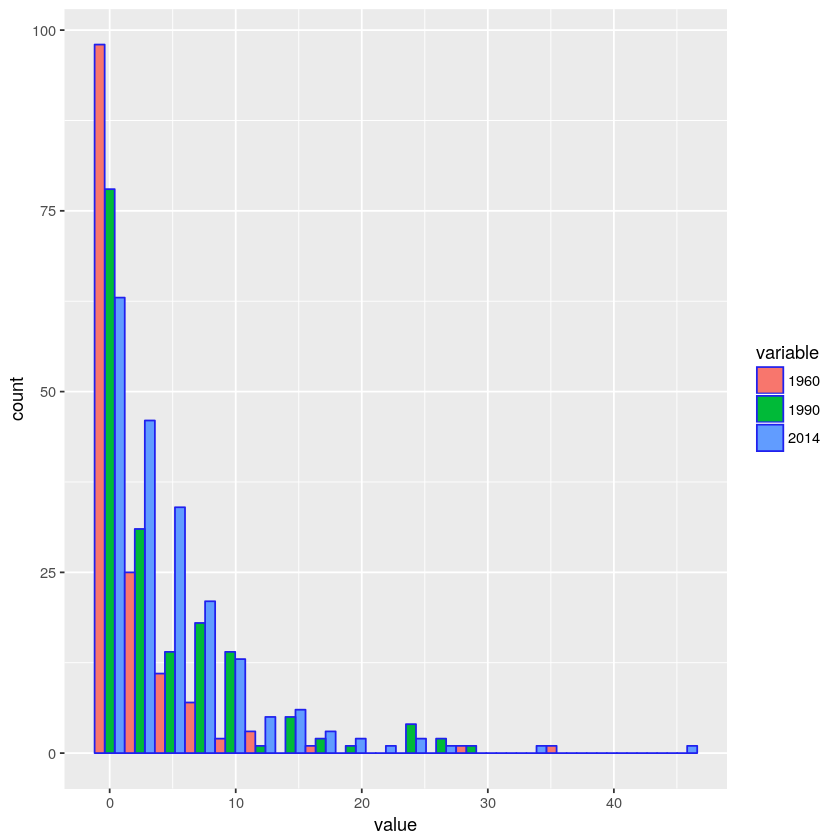

In [13]:
ggplot(data=databank6,aes(value,fill=variable))+geom_histogram(bins=20, color="#2020EE", position="dodge")

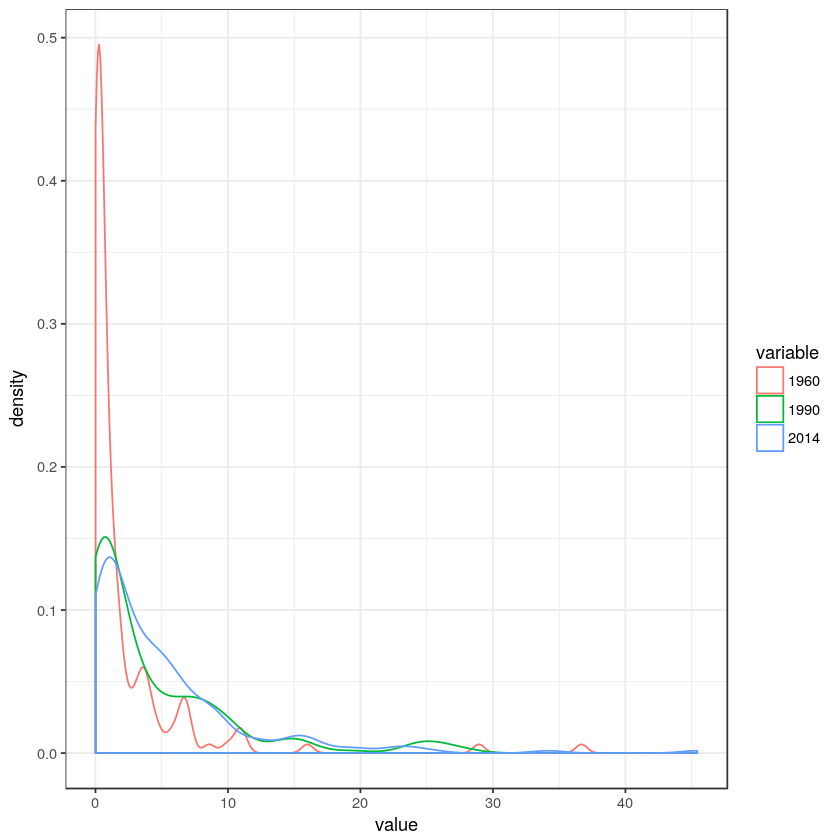

In [14]:
ggplot(data=databank6,aes(value,color=variable))+geom_density()+theme_bw()

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

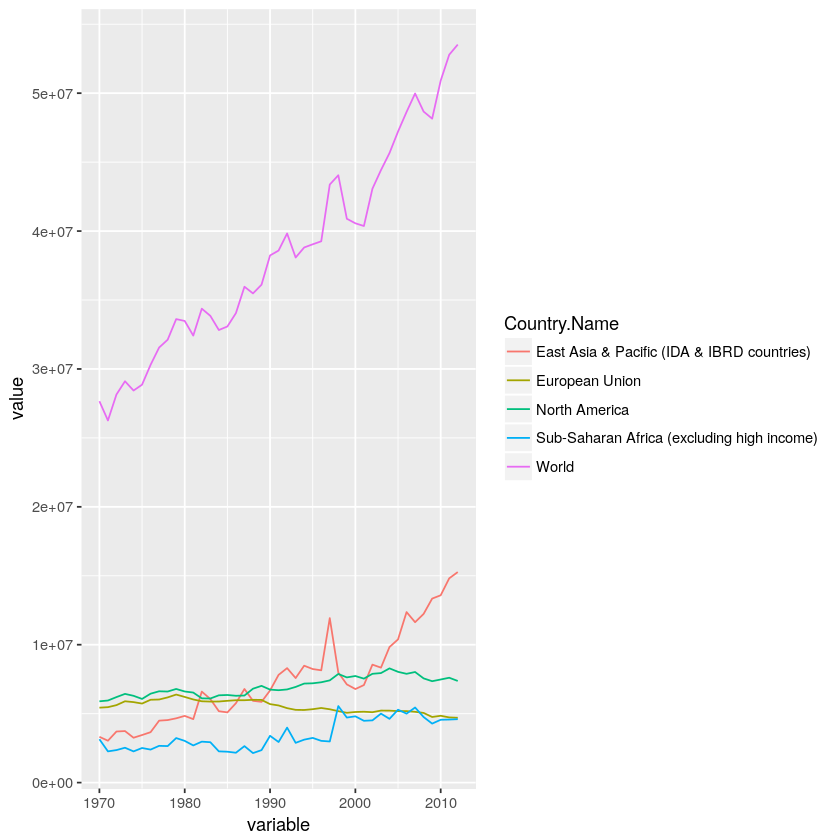

In [15]:
databank1<-databank[(databank$Country.Code == "WLD" | databank$Country.Code == "EUU" |
                     databank$Country.Code == "SSA" | databank$Country.Code == "NAC" |
                     databank$Country.Code == "TEA") & databank$Indicator.Code == "EN.ATM.GHGT.KT.CE",]
databank2<-subset(databank1, select=c(1,5:63))

require(reshape2)
databank3<-melt(databank2, id = "Country.Name")   
databank4<-databank3[complete.cases(databank3),]
databank4$variable<-as.numeric(levels(databank4$variable)[databank4$variable])

ggplot(databank4,aes(x=variable,y=value,color=Country.Name)) + geom_line() 

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

In [16]:
databank1<-subset(databank[databank$Country.Code == "WLD" & 
                  databank$Indicator.Code == "EN.ATM.GHGT.KT.CE",], select=c(1,5:63))
databank2<- na.omit(melt(databank1,id=c("Country.Name")))
databank3<-subset(databank2, select=c(2:3))
databank3$variable<-as.numeric(as.character(databank3$variable))

rl1 <- lm(data=databank3, formula = value ~ variable)
rl3 <- lm(data=databank3, formula = value ~ poly(variable,3))
rl10 <- lm(data=databank3, formula = value ~ poly(variable,10))

interv1970_2020 <- data.frame(variable = seq(1970,2020))
pr1<-data.frame(interv1970_2020,value=predict(rl1,interv1970_2020))
pr3<-data.frame(interv1970_2020,value=predict(rl3,interv1970_2020))
pr10<-data.frame(interv1970_2020,value=predict(rl10,interv1970_2020))


In [17]:
sprintf(paste("Total de emisiones de CO2 en todo el mundo en el año 2020 (modelo basado en un polinomio de grado 1):",pr1[nrow(pr1),2],"kt of CO2"))
sprintf(paste("Total de emisiones de CO2 en todo el mundo en el año 2020 (modelo basado en un polinomio de grado 3):",pr3[nrow(pr3),2],"kt of CO2"))
sprintf(paste("Total de emisiones de CO2 en todo el mundo en el año 2020 (modelo basado en un polinomio de grado 10):",pr10[nrow(pr10),2],"kt of CO2"))

[1] "Total de emisiones de CO2 en todo el mundo en el año 2020 (modelo basado en un polinomio de grado 1): 55152033.5459535 kt of CO2"

[1] "Total de emisiones de CO2 en todo el mundo en el año 2020 (modelo basado en un polinomio de grado 3): 65067658.6356923 kt of CO2"

[1] "Total de emisiones de CO2 en todo el mundo en el año 2020 (modelo basado en un polinomio de grado 10): 462426958.413677 kt of CO2"

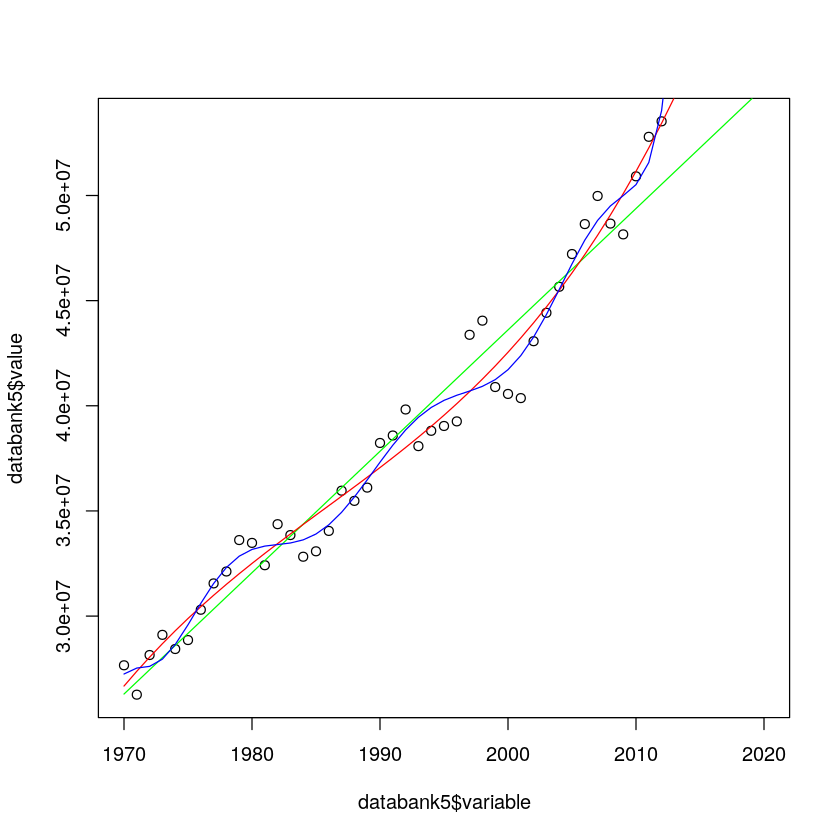

In [18]:
databank4<-databank3$value
length(databank4) = length(interv1970_2020$variable)
databank5<-as.data.frame(cbind(variable=interv1970_2020$variable, value=databank4))

plot(databank5$variable,databank5$value)
lines(pr1$variable,pr1$value,col="green")
lines(pr3$variable,pr3$value,col="red")
lines(pr10$variable,pr10$value,col="blue")

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [19]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))
#head(co2ppm)

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

[1] "Correlación alta entre el nivel de CO2 medido en la atmósfera y emitido por todos los países: 0.9837"

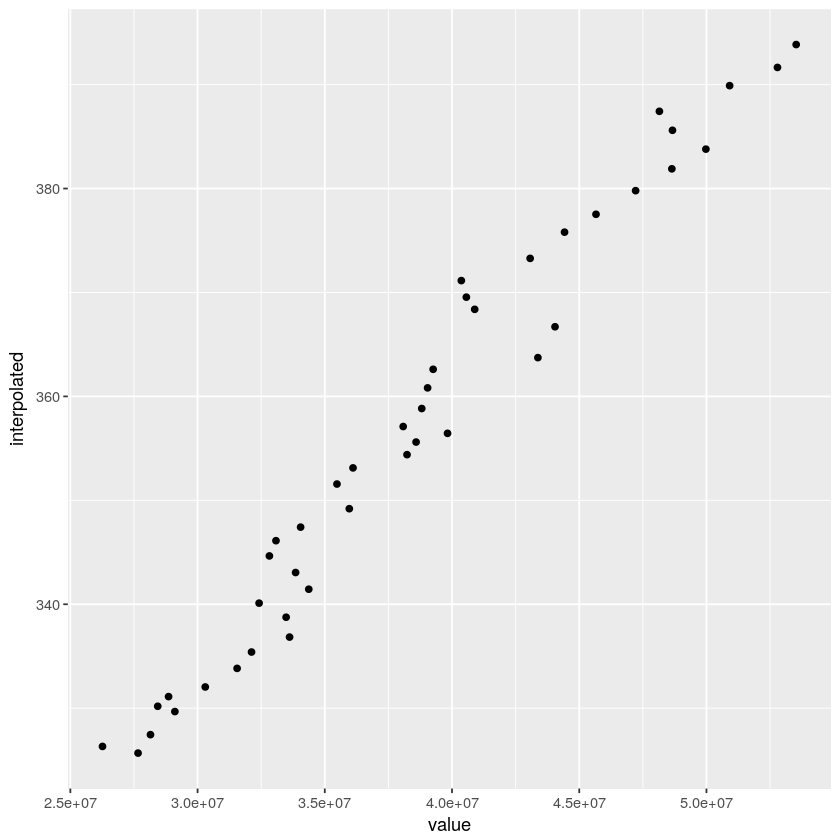

In [21]:
require(plyr)
co2ppm1<-ddply(co2ppm, .(year), summarize, interpolated=mean(interpolated))
co2ppm2 <- merge(co2ppm1, databank3, by.x = "year", by.y = "variable")
co2ppm3 <- cor(co2ppm2$value,co2ppm2$interpolated)
sprintf(paste("Correlación alta entre el nivel de CO2 medido en la atmósfera y emitido por todos los países:",
            round(co2ppm3,4)))
ggplot(data=co2ppm2,aes(x=value,y=interpolated))+geom_point()

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [22]:
co2ppm4<-co2ppm[,c('year','interpolated')]

weatherPraga10 <- data.frame(weatherPraga$DATE,weatherPraga$EMNT)

Correlacion1<-merge(co2ppm4,databank3,by.x="year", by.y="variable")
Correlacion2<-merge(Correlacion1,weatherPraga10,by.x="year", by.y="weatherPraga.DATE")

cor(Correlacion2[,c('interpolated','value','weatherPraga.EMNT')])

,interpolated,value,weatherPraga.EMNT
interpolated,1.00000000,0.96430476,-0.02403528
value,0.96430476,1.00000000,-0.05810697
weatherPraga.EMNT,-0.02403528,-0.05810697,1.00000000
